<a href="https://colab.research.google.com/github/KamonohashiPerry/PyTorch/blob/master/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorchのインストール

In [0]:
# pip install http://download.pytorch.org/whl/cu80/torch-0.4.0-cp36-cp36m-linux_x86_64.whl

In [0]:
# pip install torchvision

In [0]:
# pip install tqdm

インストールできたかの確認

In [0]:
import torch

In [2]:
torch.tensor([1, 2, 3]).to("cuda:0")

tensor([1, 2, 3], device='cuda:0')

データのやりとり

In [0]:
# !wget http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz

In [0]:
# !tar xf lfw-deepfunneled.tgz

In [0]:
# !mkdir lfw-deepfunneled/train

In [0]:
# cd lfw-deepfunneled

In [0]:
# !mv [A-W]* train

In [0]:
# !mkdir test

In [0]:
# pwd

In [0]:
# !mv [X-Z]* test

In [0]:
# ls -l

ファイルのアップロード

In [0]:
from google.colab import files

# ダイアログが表示され、ローカルファイルを選択してアップロード
uploaded = files.upload()

Saving marimo.png to marimo.png


In [0]:
# ファイルのダウンロード
 files.download("result.txt")

あるいは、Google Driveのマウント

In [6]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL

vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145605 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.14-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [7]:
# drive mean root directory of  google drive
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive/"Colab Notebooks"/PyTorch

PyTorch.ipynb


# Chapter1
## 生成と変換

In [0]:
import numpy as np
import torch

# 入れ子のlistを渡して作成
t = torch.tensor([[1, 2], [3, 4]])
t

tensor([[1, 2],
        [3, 4]])

In [0]:
# deviceを指定することでGPUにTensorを作成する
t = torch.tensor([[1, 2], [3, 4]], device="cuda:0")
t

tensor([[1, 2],
        [3, 4]], device='cuda:0')

In [0]:
# dtypeを指定することで倍精度のTensorを作る
t = torch.tensor([[1, 2], [3, 4]], dtype=torch.float64)
t

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [0]:
# 0から9までの数値で初期化された1次元のTensor
t = torch.arange(0, 10)
t

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
# 全ての値が0の100×10のTensorを作成し、toメソッドでGPUに転送する
t = torch.zeros(100, 10).to("cuda:0")
t

In [0]:
# 正規乱数で100×10のTensorを作成
t = torch.randn(100, 10)
t

In [0]:
# Tensorのshapeはsizeメソッドで取得可能
t.size()

torch.Size([100, 10])

In [0]:
# numpyメソッドを使用してndarrayに変換
t = torch.tensor([[1, 2], [3, 4.]])
x = t.numpy()
x

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [0]:
# GPU上のTensorはcpuメソッドで、一度CPUのTensorに変換する
t = torch.tensor([[1, 2], [3, 4.]], device="cuda:0")
x = t.to("cpu").numpy()
x

array([[1., 2.],
       [3., 4.]], dtype=float32)

## インデクシング

In [0]:
t = torch.tensor([[1, 2, 3], [4, 5, 6.]])
t

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [0]:
# スカラーの添字で指定
t[0, 2]

tensor(3.)

In [0]:
# スライスで指定
t[:, :2]

tensor([[1., 2.],
        [4., 5.]])

In [0]:
# 添字のリストで指定
t[:, [1, 2]]

tensor([[2., 3.],
        [5., 6.]])

In [0]:
# マスク配列を使用して3より大きい部分のみ選択
t[t > 3]

tensor([4., 5., 6.])

In [0]:
# [0, 1]要素を100にする
t[0, 1] = 100
t

tensor([[  1., 100.,   3.],
        [  4.,   5.,   6.]])

In [0]:
# スライスを使用した一括代入
t[:,1] = 200
t

tensor([[  1., 200.,   3.],
        [  4., 200.,   6.]])

In [0]:
# マスク配列を使用して特定条件の要素のみ置換
t[t > 10] = 20
t

tensor([[ 1., 20.,  3.],
        [ 4., 20.,  6.]])

## Tensorの演算

In [0]:
# 長さ3のベクトル
v = torch.tensor([1, 2, 3.])
w = torch.tensor([0, 10, 20.])

# 2×3の行列
m = torch.tensor([[0, 1, 2], [100, 200, 300.]])

In [0]:
# ベクトルとスカラーの足し算
v2 = v + 10
v2

tensor([11., 12., 13.])

In [0]:
# 累乗
v2 = v **2
v2

tensor([1., 4., 9.])

In [0]:
# 同じ長さのベクトル同士の引き算
z = v -w
z

tensor([  1.,  -8., -17.])

In [0]:
# 複数の組み合わせ
u = 2*v - w/10 + 6.0
u

tensor([ 8.,  9., 10.])

In [0]:
# 行列とスカラー
m2 = m*2.0
m2

tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])

In [0]:
# 行列とベクトル(2,3)行列と(3,)のベクトルなのでブロードキャストが働く
m3 = m + v
m3

tensor([[  1.,   3.,   5.],
        [101., 202., 303.]])

In [0]:
# 行列同士
m4 = m + m
m4

tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])

In [0]:
# 100×10のテストデータを用意
X = torch.randn(100, 10)
X

In [0]:
# 数学関数を含めた数式
y = X * 2 + torch.abs(X)
y

In [0]:
# 平均値を求める
m = torch.mean(X)
m

tensor(0.0036)

In [0]:
# 関数ではなくメソッドとして利用
m = X.mean()
m

tensor(0.0036)

In [0]:
# 集計結果は0次元のTensorでitemメソッドを使用して、値を取り出すことができる
m_value = m.item()
m_value

0.0036013589706271887

In [0]:
# 集計は次元を指定できる。行方向に集計して列ごとに平均値を計算している
m2 = X.mean(0)
m2

tensor([ 0.0083, -0.0236, -0.0680,  0.0284,  0.1196, -0.0445, -0.0494,  0.0321,
        -0.0242,  0.0572])

In [0]:
x1 = torch.tensor([[1, 2], [3, 4.]])
x1

tensor([[1., 2.],
        [3., 4.]])

In [0]:
x2 = torch.tensor([[10, 20, 30], [40, 50, 60.]])
x2

tensor([[10., 20., 30.],
        [40., 50., 60.]])

In [0]:
# 2×2を4×1に見せる
x1.view(4, 1)

tensor([[1.],
        [2.],
        [3.],
        [4.]])

In [0]:
# -1は残りの次元を表し、一度だけ使用できる。以下の例では-1とすると自動的に4になる。
x1.view(1, -1)

tensor([[1., 2., 3., 4.]])

In [0]:
# 2×3を転置して3×2にする
x2.t()

tensor([[10., 40.],
        [20., 50.],
        [30., 60.]])

In [0]:
# dim=1に対して結合することで2×5のTensorを作る
torch.cat([x1, x2], dim=1)

tensor([[ 1.,  2., 10., 20., 30.],
        [ 3.,  4., 40., 50., 60.]])

In [0]:
# HWCをCHWに変換、64×32×3のデータが100個
hwc_img_data = torch.rand(100, 64, 32, 3)
chw_img_data = hwc_img_data.transpose(1, 2).transpose(1, 3)

In [0]:
m = torch.randn(100, 10)
v = torch.randn(10)

In [0]:
# 内積
d = torch.dot(v, v)
d

tensor(17.4666)

In [0]:
# 100×10の行列と長さ10のベクトルとの積
v2 = torch.mv(m, v)
v2

tensor([-4.1080e+00,  5.3765e-01,  5.7592e+00, -1.6794e+00,  2.2439e+00,
         8.3089e+00, -7.4586e-01, -5.8227e+00, -1.0849e-01, -8.1938e+00,
         3.9044e+00,  9.4531e+00, -3.1840e-01, -1.1309e+00,  2.3417e-02,
        -2.5013e+00,  6.8780e+00, -3.5271e+00, -1.7255e+00,  2.5360e+00,
        -3.0046e-01, -2.9452e+00,  2.8258e+00, -1.2579e+00, -4.0532e-02,
         2.0794e+00,  9.4635e+00, -1.3758e+00, -2.6648e+00, -5.3184e+00,
        -5.0640e-01,  1.8866e+00,  3.2948e+00,  3.9837e+00,  5.0172e+00,
         2.5829e-01,  1.5913e+00, -1.0546e-01, -1.2097e+00,  1.0413e+00,
         4.8595e+00, -1.3399e-01, -1.1639e+00,  1.0490e+00, -9.1263e-01,
         1.1411e+01,  5.9109e+00, -9.5108e-01,  2.0456e+00,  3.3997e+00,
         9.1413e-01, -8.1674e-01,  2.2282e+00,  6.7287e-01,  9.0305e-03,
         5.2423e+00,  5.3973e+00, -7.0525e-01, -5.9080e+00, -1.7301e+00,
         5.3531e+00, -3.1836e-01, -4.7825e+00,  3.7610e+00,  5.5606e+00,
         1.6307e+00, -1.2596e+00, -1.2388e+00, -9.1

In [0]:
# 行列積
m2 = torch.mm(m.t(), m)
m2

tensor([[ 88.6999,  16.8399,  -1.7409,  -8.8934,   1.0312,  -7.5898,   3.7423,
         -13.0312,   5.2649,   2.2321],
        [ 16.8399,  94.9152, -13.7689,   3.0353, -13.3565,  -6.4321,   7.5703,
         -12.7566,   8.0555,   3.1600],
        [ -1.7409, -13.7689, 102.0199,  16.1736, -16.3016,   1.1649,  -4.8343,
           5.2625,   2.4661,   5.6831],
        [ -8.8934,   3.0353,  16.1736,  73.5954, -19.8169,   5.5297,  16.8452,
          -5.4883,  -4.7374,  -4.7303],
        [  1.0312, -13.3565, -16.3016, -19.8169, 110.5415,   2.0283,  -1.9022,
          -4.1909, -16.5033,  -7.1431],
        [ -7.5898,  -6.4321,   1.1649,   5.5297,   2.0283, 104.1705,  -3.9745,
           6.2859,  -9.4617,  -9.2764],
        [  3.7423,   7.5703,  -4.8343,  16.8452,  -1.9022,  -3.9745, 123.3382,
          -7.1959,   7.9372,   1.0088],
        [-13.0312, -12.7566,   5.2625,  -5.4883,  -4.1909,   6.2859,  -7.1959,
          91.2110,   3.5681,  14.1793],
        [  5.2649,   8.0555,   2.4661,  -4.7374,

In [0]:
# 特異値分解
u, s, v = torch.svd(m)

In [0]:
u.shape

torch.Size([100, 10])

In [0]:
s.shape

torch.Size([10])

In [0]:
v.shape

torch.Size([10, 10])

## Tensorと自動微分

In [0]:
x = torch.randn(100, 3)

# 微分の変数として扱う場合はrequires_gradフラグをTrueにする
a = torch.tensor([1, 2, 3.], requires_grad=True)

In [0]:
# 計算することで自動的に計算グラフが構築されていく
y = torch.mv(x, a)
y

tensor([ 7.9341, -1.3792,  6.6535, -5.6779,  4.9843, -4.0705, -4.3138,  0.2047,
        -2.6373,  5.8026,  1.1865, -2.9149,  3.0847, -2.3475,  0.0153, -4.1135,
        -4.8194,  0.4603, -4.4507,  0.9047,  2.7670,  5.4219,  7.1426,  2.2130,
         0.2147, -0.6748, -6.2929,  1.1356,  2.5060, -3.1605, -1.1050,  2.6581,
        -1.1224,  0.9456, -2.8387,  3.4650,  6.4997,  3.9475,  1.9249, -0.8462,
        -3.1316, -0.2826,  0.6069, -0.6368, -4.5541, -0.5465,  0.7037, -5.7507,
         4.1582, -1.2311, -1.7590,  1.3672, -3.9603,  5.2785, -0.7253, -6.4611,
        -2.5383, -5.1378,  2.8117, -0.5625,  0.7856, -6.9797,  3.2073,  3.0460,
        -0.4506,  0.6130,  0.2186,  0.9219,  6.4271,  1.4675,  4.2728,  2.0680,
         4.3799,  3.5207,  0.7484,  6.9379,  0.2198,  0.5992,  2.5581,  4.2026,
        -1.2401,  2.4576,  6.3013, -0.2028,  2.0234, -1.3357, -0.5979, -4.5570,
        -0.5299, -0.8345,  5.0021, -8.3483, -2.8570, -3.2076,  0.3620, -7.1454,
         4.2216,  6.5898, -1.1265, -0.68

In [0]:
o = y.sum()
o

tensor(30.0060, grad_fn=<SumBackward0>)

In [0]:
# 微分を実行する
o.backward()

In [0]:
# 解析解と比較
a.grad != x.sum(0)

tensor([False, False, False])

In [0]:
a.grad

tensor([18.3623, -4.4232,  6.8300])

In [0]:
x.sum(0)

tensor([18.3623, -4.4232,  6.8300])

# Chapter2
## PyTorchで線形回帰モデル(scratch)

In [1]:
import torch

# 真の係数
w_true = torch.Tensor([1, 2, 3])

w_true

tensor([1., 2., 3.])

In [2]:
# Xのデータの準備。切片を回帰係数に含めるため、Xの最初の次元に1を追加しておく
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)
X.shape

torch.Size([100, 3])

In [3]:
# 真の係数と各Xとの内積を行列とベクトルの積でまとめて計算
y = torch.mv(X, w_true) + torch.randn(100) * 0.5
y.shape

torch.Size([100])

In [4]:
# 勾配降下で最適化するためのパラメータのTensorを乱数で初期化して作成
w = torch.randn(3, requires_grad = True)
w.shape

torch.Size([3])

In [0]:
# 学習率
gamma = 0.1

# 損失関数のログ
losses = []

# 100回のイテレーションを回す
for epoc in range(100):
  # 前回のbackwardメソッドで計算された勾配の値を削除
  w.grad = None

  # 線形モデルでyの予測値を計算
  y_pred = torch.mv(X, w)

  # MSE lossとwによる微分を計算
  loss = torch.mean((y - y_pred)**2)
  loss.backward()

  # 勾配を更新する
  # wそのまま代入して更新すると異なるTensorぶばっれ計算グラフが破壊されてしまうのでdataだけを更新する
  w.data = w.data - gamma * w.grad.data

  # 収束確認のためにlossを記録しておく
  losses.append(loss.item())


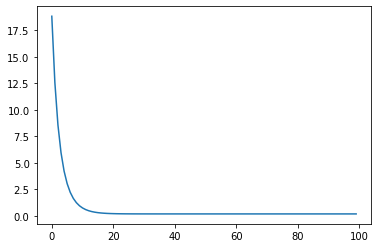

In [6]:
from matplotlib import pyplot as plt
plt.plot(losses);

In [7]:
w

tensor([1.0072, 2.0349, 2.9585], requires_grad=True)

## PyTorchで線形回帰モデル(nn, optimモジュールの使用)

In [0]:
from torch import nn, optim

# Linear層を作成。今回は切片項を回帰係数に含めるので入力の次元を3とし、bias(切片)をFalseにする。
net = nn.Linear(in_features=3, out_features=1,bias=False) # 線形結合を計算するためのクラス。学習結果のパラメータを残すなどの機能も備えている。

# SGDのオプティマイザーに上で定義したネットワークのパラメータを渡して初期化
optimizer = optim.SGD(net.parameters(), lr=0.1)

# MSE lossクラス
loss_fn = nn.MSELoss()

In [0]:
# 損失関数のログ
losses = []

# 100回イテレーションを回す
for epoc in range(100):
  # 前回のbackwardメソッドで計算された勾配の値を削除
  optimizer.zero_grad()

  # 線形モデルでyの予測値を計算
  y_pred = net(X)

  # MSE lossを計算。y_predは(n,1)のようなshapeを持っているので、(n,)に直す必要がある。
  loss = loss_fn(y_pred.view_as(y), y)

  # lossのwによる微分を計算
  loss.backward()

  # 勾配を更新する
  optimizer.step()

  # 収束確認のためにlossを記録しておく
  losses.append(loss.item())


In [10]:
list(net.parameters())

[Parameter containing:
 tensor([[1.0072, 2.0349, 2.9585]], requires_grad=True)]

## ロジスティック回帰
### PyTorchでロジスティック回帰

In [0]:
from sklearn.datasets import load_iris

iris = load_iris()

# irisは(0, 1, 2)の3クラスの分類問題なので、ここでは(0, 1)の2クラス分のデータだけを使用する。本来は訓練用とテスト用に分けるべきだがここでは省略
X = iris.data[:100]
y = iris.target[:100]

# NumPyのndarrayをPyTorchのTensorに変換
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# irisのデータは4次元
net = nn.Linear(4, 1)

# シグモイド関数を作用させ、2クラス分類のクロスエントロピーを計算する関数
loss_fn = nn.BCEWithLogitsLoss()

# SGD(少し大きめの学習率)
optimizer = optim.SGD(net.parameters(), lr=0.25)

# 損失関数のログ
losses = []

# 100回イテレーションを回す
for epoc in range(100):
  # 前回のbackwardメソッドで計算された勾配の値を削除
  optimizer.zero_grad()

  # 線形モデルでyの予測値を計算
  y_pred = net(X)

  # MSE lossとwによる微分を計算
  loss = loss_fn(y_pred.view_as(y), y)
  loss.backward()

  # 勾配を更新する
  optimizer.step()

  # 収束確認のためにlossを記憶しておく
  losses.append(loss.item())

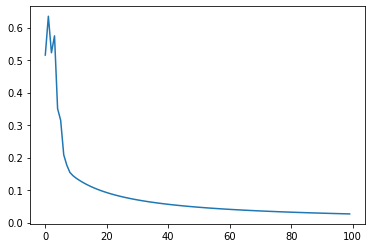

In [21]:
from matplotlib import pyplot as plt

plt.plot(losses);

In [24]:
# 線形結合の結果
h = net(X)

# シグモイド関数を作用させた結果はy=1の確率を表す
prob = nn.functional.sigmoid(h)

# 確率が0,5以上のものをクラス1と予想し、それ以外を0とする
# PyTorchにはBool型がないので、対応する型としてByteTensorが出力される
y_pred = prob > 0.5

# 予測結果の確認(yはFloatTensotなのでByteTensorに変換してから比較する)
(y.byte() == y_pred.view_as(y)).sum().item()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


100

## 多クラスのロジスティック回帰

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

X = torch.tensor(X, dtype=torch.float32)
# CrossEntropyLoss関数はyとしてint64型のTensorを受け取るので注意
y = torch.tensor(y, dtype=torch.int64)

In [28]:
y.shape

torch.Size([1797])

In [30]:
# 出力は10(クラス数)次元
net = nn.Linear(X.size()[1], 10)

# ソフトマックスクロスエントロピー
loss_fn = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 損失関数のログ
losses = []

# 100回イテレーションを回す
for epoc in range(100):
  # 前回のbackwardメソッドで計算された勾配の値を削除
  optimizer.zero_grad()

  # 線形モデルでyの予測値を計算
  y_pred = net(X)

  # MSE lossとwによる微分を計算
  loss = loss_fn(y_pred, y)
  loss.backward()

  # 勾配を更新する
  optimizer.step()

  # 収束確認のためにlossを記憶しておく
  losses.append(loss.item())

# torch.maxは集計軸を指定すると最大値の他にその位置も返す
_, y_pred = torch.max(net(X), 1)

# 正解率を計算する
(y_pred == y).sum().item() / len(y)

0.9521424596549806

# Chapter3

In [0]:
import torch
from torch import nn

# nn.Sequentialで次々にnn.Moduleの層を重ねていく
# netは微分可能
net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

from torch import optim
from sklearn.datasets import load_digits
digits = load_digits()


# CPUモード
X = digits.data
Y = digits.target

# Numpyのndarrayをpytorchのtensorに変換
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

# ソフトマックスクロスエントロピー
loss_fn = nn.CrossEntropyLoss()

# Adam
optimizer = optim.Adam(net.parameters())

# 損失関数のログ
losses = []

# 150回iterationを回す
for epoc in range(500):
  # 前回のbackwardメソッドで計算された勾配の値を削除
  optimizer.zero_grad()

  # 線形モデルでyの予測値を計算
  y_pred = net(X)

  # MSE lossとwによる微分を計算
  loss = loss_fn(y_pred, Y)
  loss.backward()

  # 勾配を更新する
  optimizer.step()

  # 収束確認のためにlossを記録しておく
  losses.append(loss.item())


In [38]:
# torch.maxは集計軸を指定すると最大値の他にその位置も返す
_, y_pred = torch.max(net(X), 1)

# 正解率を計算する
(y_pred == y).sum().item() / len(y)

1.0

In [0]:
# # GPUモード
# X = digits.data
# Y = digits.target

# # Numpyのndarrayをpytorchのtensorに変換
# X = torch.tensor(X, dtype=torch.float32)
# Y = torch.tensor(Y, dtype=torch.int64)

# X = X.to("cuda:0")
# Y = Y.to("cuda:0")
# net.to("cuda:0")

# # ソフトマックスクロスエントロピー
# loss_fn = nn.CrossEntropyLoss()

# # Adam
# optimizer = optim.Adam(net.parameters())

# # 損失関数のログ
# losses = []

# # 150回iterationを回す
# for epoc in range(500):
#   # 前回のbackwardメソッドで計算された勾配の値を削除
#   optimizer.zero_grad()

#   # 線形モデルでyの予測値を計算
#   y_pred = net(X)

#   # MSE lossとwによる微分を計算
#   loss = loss_fn(y_pred, Y)
#   loss.backward()

#   # 勾配を更新する
#   optimizer.step()

#   # 収束確認のためにlossを記録しておく
#   losses.append(loss.item())

# # cudaの場合は予測どうするのだろう？

## datasetとdataloader

In [0]:
from torch.utils.data import TensorDataset, DataLoader

# Datasetを作成
ds = TensorDataset(X, Y)

# 異なる順番で64個ずつデータを返すDataLoaderを作成
loader = DataLoader(ds, batch_size=64, shuffle=True)

net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

# 最適化を実行
losses = []

for epoch in range(10):
  running_loss = 0.0
  for xx, yy in loader:
    # xx, yyは64個分のみ受け取れる
    y_pred = net(xx)
    loss = loss_fn(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  losses.append(running_loss)

## dropoutによる正則化

In [0]:
# データを訓練用と検証用に分割
from sklearn.model_selection import train_test_split

# 全体の30%は検証用
X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

# 層を積み重ねて深いニューラルネットワークを構築する
k = 100

net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, 10)  
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
# 訓練用データでDataLoaderを作成
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

train_losses = []
test_losses = []
for epoch in range(100):
  running_loss = 0.0
  for i, (xx, yy) in enumerate(loader):
    y_pred = net(xx)
    loss = loss_fn(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  train_losses.append(running_loss)
  y_pred = net(X_test)
  test_loss = loss_fn(y_pred, Y_test)
  test_losses.append(test_loss.item())

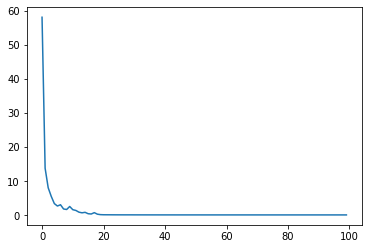

In [51]:
from matplotlib import pyplot as plt
plt.plot(train_losses);

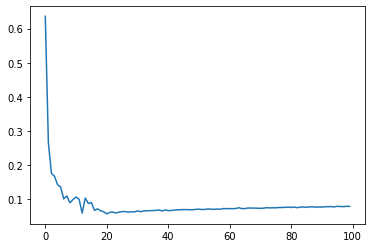

In [52]:
plt.plot(test_losses);

In [0]:
# trainとevalメソッドでdropoutの挙動を切り替える

# データを訓練用と検証用に分割
from sklearn.model_selection import train_test_split

# 全体の30%は検証用
X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

# 層を積み重ねて深いニューラルネットワークを構築する
k = 100

# 確率0.5でランダムに変数の次元を捨てるdropoutを各層に追加
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, 10)  
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
# 訓練用データでDataLoaderを作成
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

train_losses = []
test_losses = []
for epoch in range(100):
  running_loss = 0.0
  # ネットワークを訓練モードにする
  net.train()
  for i, (xx, yy) in enumerate(loader):
    y_pred = net(xx)
    loss = loss_fn(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  train_losses.append(running_loss/i)
  #ネットワークを評価モードにして検証データの損失関数を計算する
  net.eval()

  y_pred = net(X_test)
  test_loss = loss_fn(y_pred, Y_test)
  test_losses.append(test_loss.item())

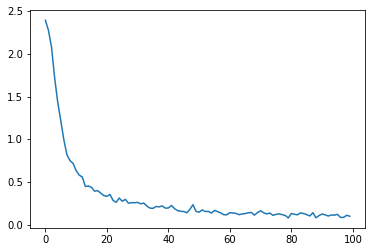

In [54]:
from matplotlib import pyplot as plt
plt.plot(train_losses);

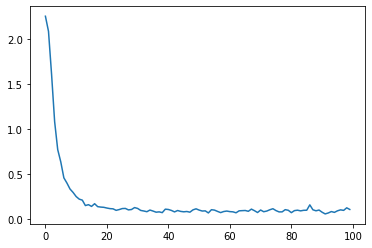

In [55]:
from matplotlib import pyplot as plt
plt.plot(test_losses);

In [0]:
# batch normalizationによる学習の加速
# データを訓練用と検証用に分割
from sklearn.model_selection import train_test_split

# 全体の30%は検証用
X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

# 層を積み重ねて深いニューラルネットワークを構築する
k = 100

# 確率0.5でランダムに変数の次元を捨てるdropoutを各層に追加
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, 10)  
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
# 訓練用データでDataLoaderを作成
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

train_losses = []
test_losses = []
for epoch in range(100):
  running_loss = 0.0
  # ネットワークを訓練モードにする
  net.train()
  for i, (xx, yy) in enumerate(loader):
    y_pred = net(xx)
    loss = loss_fn(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  train_losses.append(running_loss/i)
  #ネットワークを評価モードにして検証データの損失関数を計算する
  net.eval()

  y_pred = net(X_test)
  test_loss = loss_fn(y_pred, Y_test)
  test_losses.append(test_loss.item())

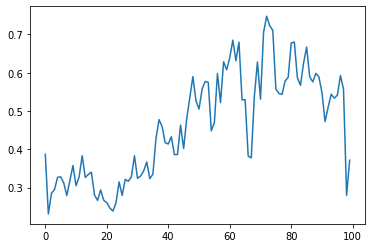

In [57]:
from matplotlib import pyplot as plt
plt.plot(test_losses);

## ネットワークのモジュール化

In [0]:
class CustomLinear(nn.Module):
  def __init__(self, in_features,
               out_features,
               bias=True,
               p=0.5):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features, bias)
    self.relu = nn.ReLU()
    self.drop = nn.Dropout(p)

  def foward(self, x):
    x = self.linear(x)
    x = self.relu(x)
    x = self.drop(x)
    return x

mlp = nn.Sequential(
    CustomLinear(64, 200),
    CustomLinear(200, 200),
    CustomLinear(200, 200),
    nn.Linear(200, 10)
)

In [0]:
class MyMLP(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.ln1 = CustomLinear(in_features, 200)
    self.ln2 = CustomLinear(200, 200)
    self.ln3 = CustomLinear(200, 200)
    self.ln4 = CustomLinear(200, out_features)

  def forward(self, x):
    x = self.ln1(x)
    x = self.ln2(x)
    x = self.ln3(x)
    x = self.ln4(x)
    return x

mlp = MyMLP(64, 10)

# Chapter4

In [0]:
import torch
from torch import nn, optim
from torch.utils.data import (Dataset, DataLoader, TensorDataset)
import tqdm